## Project 2
## HealthCare
by Daryna Kondratiuk and Trang Vu

## Symptom clusters in cardiovascular disease

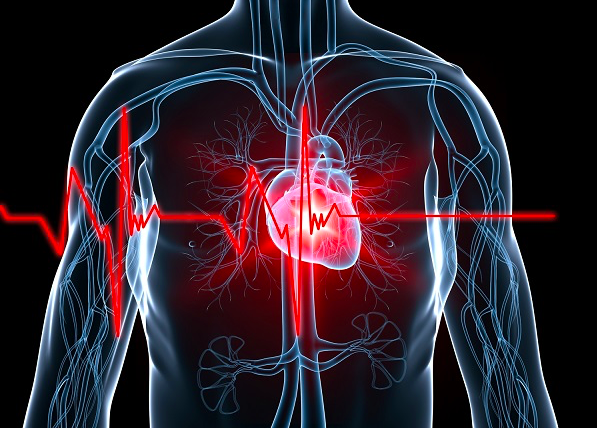

<a id="contents"></a>
<div>
    <h1>
    Table of Contents
    </h1>
    <br>
    1. <a href='#intro'>Objective of the Proposed Research</a><br>
    2. <a href='#dataExp'>Data Exploration</a><br>
    3. <a href='#dataClean'>Data Cleaning</a><br>
    4. <a href='#adapt'>Adaption</a><br>
    5. <a href='#visual'>Descriptive Static Visualization</a><br>
    6. <a href='#explorecor'>Explore Correlations</a><br>
    7. <a href='#stepclust'>Step-by-step hierarchical clustering</a><br>
    8. <a href='#dendo'>Dendrogram</a><br>
    9. <a href='#Kmeans'>Step-by-step K-means</a><br>
   10. <a href='#sklearn.cluster'>sklearn.cluster</a><br>
   11. <a href='#knn'>kNN Function</a><br>
   12. <a href='#report'>Project Report</a><br>
</div>

<a id="intro"></a>
<div>
    <h1>
        1. Objective of the Proposed Research 
    </h1> 
</div>

Our dataset consists of four databases: Cleverland, Hungary, Switzerland and Long Beach.In our morden life,heart disease cases increase significantly that triggers and threaten people around the world and many scientists has been working days by days to define solution and factors that could affect heart disease nowsadays. In this project, We would like to utilize this dataset to get a comprehensive overview of factors that could trigger or impact heart 
disease and gain some insight to provide and predict the solution based on the pattern and different aspects like excercise, depression, blood pressure, heart rates, vessels and so on. 

The goal is identify 2 groups of patients who had and who doesn't have heart disease by having similar symptoms.We will first explore the dataset to gain some brief information and statistic overview of the dataset, important 
attributes and information. We will also do some research in the background to have a proper knowdlege of the basic 
medical field regarding heart disease, blood pressure and some typical synonym involved in the dataset. Moving along
after finishing exploration, we will discuss and decide what elements we would like to keep for our further steps by 
utilize data cleaning. With data adaptation, we will create columns to keep track of the heart disease in each case by assigning string value for better retrieval and utilization of information in the future. We then will proceed to 
further analyzation and data clustering to gain persepctives and insights about the matter by focusing in some prospect factor like depression and excerise for causing heart disease. 

In our project, our stakeholder will be the American Heart Association since they are the nation's oldest and largest voluntary organization devoted to fighting heart disease and stroke. We would like to provide useful insight to help the American Heart Association find solution and educate people to prevent this 
kind of diease while making decision about what type of support they could provide to help people gain better 
health. 

<a href="#contents">Table of Contents</a>

<a id="dataExp"></a>
<div>
    <h1>
        2. Data Exploration 
    </h1> 
</div>

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Print out the names of columns.

In [2]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Let's see the age range that we have in our dataset.

In [3]:
df.age.unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74])

In [4]:
# Statistic meanings of column age
df.age.describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

In [5]:
# Statistic information of column target
df.target.describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [6]:
# Statistic information of column sex
df.sex.describe()

count    1025.000000
mean        0.695610
std         0.460373
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [7]:
# Dimension of the dataset
df.shape

(1025, 14)

Check the type of values in columns

In [8]:
#Let's get a brief overview of data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Check if there are any NA in the dataframe.

In [9]:
# Using isnull() and any() function 
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [10]:
# Using isnull() and any() function 
# to check if any NA in the dataframe
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

<a id="dataClean"></a>
<div>
    <h1>
        3. Data Cleaning
    </h1> 
</div>

Since our data doesn't have any NA, we will focus on the choosing the columns which will be used for our analysis.

In [11]:
#print the names of the coulmns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
#create a subset with the columns which will be used for clustering analysis
heart_data = df[['age','sex', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak','target']]
heart_data.head()

,age,sex,trestbps,chol,fbs,thalach,oldpeak,target
0,52,1,125,212,0,168,1.0,0
1,53,1,140,203,1,155,3.1,0
2,70,1,145,174,0,125,2.6,0
3,61,1,148,203,0,161,0.0,0
4,62,0,138,294,1,106,1.9,0


So, to process clustering analysis, we will use next columns: Age, Sex, Blood pressure, Serum Cholestoral, Heart Rate, ST depression and Target.

<a href="#contents">Table of Contents</a>

<a id="adapt"></a>
<div>
    <h1>
       4. Adaptation
    </h1> 
</div>

We will rename our columns to make our dataframe more clear.

In [13]:
heart_data.columns = ['age', 'gender', 'bl_pres', 'cholest', 'blood_sug', 'heart_rate', 'depress', 'target']
heart_data.head()

,age,gender,bl_pres,cholest,blood_sug,heart_rate,depress,target
0,52,1,125,212,0,168,1.0,0
1,53,1,140,203,1,155,3.1,0
2,70,1,145,174,0,125,2.6,0
3,61,1,148,203,0,161,0.0,0
4,62,0,138,294,1,106,1.9,0


Since our dataset use a boolean values for sex and heart disease column, we will change 0 to male and 1 to female in column sex. For column heart disease will change 0 to "no disease" and 1 to "heart disease".

In [14]:
# Create a new col heart_dis and using loc to assign the value 'no disease'
#to a new col if the value is 0
heart_data.loc[heart_data.target == 0, 'heart_dis'] = "no disease"

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
# Create a new col heart_dis and using loc to assign the value 'no disease'
#to a new col if the value is 1
heart_data.loc[heart_data.target == 1, 'heart_dis'] = "disease"

In [16]:
# Create a new col gend_type and using loc to assign the value 'male'
#to a new col if the value is 0
heart_data.loc[heart_data.gender == 0, 'gend_type'] = "male"

In [17]:
# Create a new col gend_type and using loc to assign the value 'female'
#to a new col if the value is 1
heart_data.loc[heart_data.gender == 1, 'gend_type'] = "female"

Create a new column and split the data into three different age groups.

In [18]:
heart_data.loc[(heart_data.age >= 29) & (heart_data.age <= 45) , 'age_group'] = "29-45"

In [19]:
heart_data.loc[(heart_data.age > 45) & (heart_data.age <= 60) , 'age_group'] = "46-60"

In [20]:
heart_data.loc[(heart_data.age > 60) , 'age_group'] = "over 60"

In [21]:
# Let's see what we have here
heart_data.head(5)

,age,gender,bl_pres,cholest,blood_sug,heart_rate,depress,target,heart_dis,gend_type,age_group
0,52,1,125,212,0,168,1.0,0,no disease,female,46-60
1,53,1,140,203,1,155,3.1,0,no disease,female,46-60
2,70,1,145,174,0,125,2.6,0,no disease,female,over 60
3,61,1,148,203,0,161,0.0,0,no disease,female,over 60
4,62,0,138,294,1,106,1.9,0,no disease,male,over 60


In this section, we decide to add three columns which are gend_type, heart_dis and age_group, which could help us to better retrive and analyze information in more sophisticated way. We utilize loc and logical condition statements to assign value in heart_dis and gend_type according to target and gender column respectively. In age_group column, we divide our data into three main groups based on the variety of ages that we have. So we have 29-45 years old group, 46-60 years old group and over 60 years old.


<a href="#contents">Table of Contents</a>

<a id="visual"></a>
<div>
    <h1>
        5. Descriptive Visualization
    </h1> 
</div>

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Pie Chart

In [24]:
# Utilize value_counts() function to count the frequency of the age group
heart_data["age_group"].value_counts()

46-60      540
over 60    272
29-45      213
Name: age_group, dtype: int64

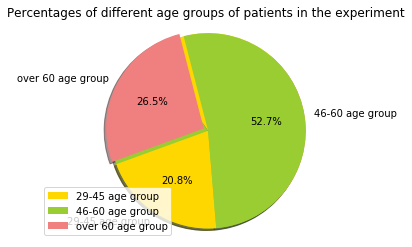

In [25]:
#calculate percentage of patients in each age group
group46to60 = 540/(540+272 + 213)
group29to45 = 213/(540+272 + 213)
groupover60 = 272/(540+272 + 213)
labels = '29-45 age group', '46-60 age group', 'over 60 age group'
sizes = [group29to45, group46to60 , groupover60]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0.05)  # explode some slices 
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=50)
plt.legend(patches, labels, loc="best")

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=200)

plt.axis('equal')
plt.title('Percentages of different age groups of patients in the experiment')
plt.show()

Pie chart shows us the percantage of patients who belongs to different age groups. So 52.7% of patients are in the age range 46-60, 26.5% are in the age of 60 or older and only 20.8 % of patients are in the age between 29-45 years old.

## 2. Categorical Scatter Plot

In [26]:
#create a subset for a scatter plot
vis_data1 = heart_data[['age_group', 'heart_rate']]
vis_data1.head()

,age_group,heart_rate
0,46-60,168
1,46-60,155
2,over 60,125
3,over 60,161
4,over 60,106


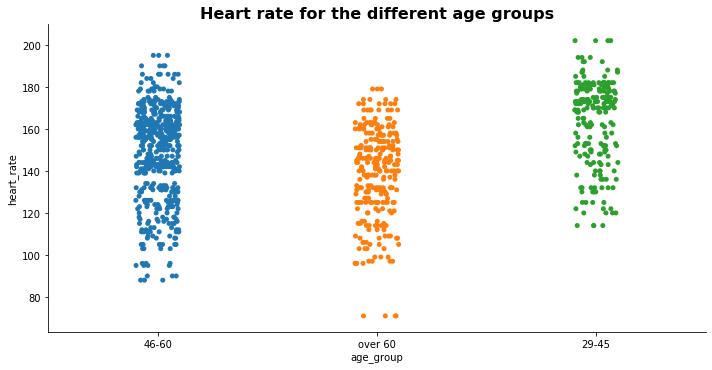

In [27]:
sns.catplot(x='age_group', y='heart_rate', data=vis_data1, aspect=2)
plt.title('Heart rate for the different age groups', weight='bold', fontsize=16)
plt.show()


In this categorical scatter plot that we just created, we visualize the differences in the heart rate for different age group. In accordance to the chart above, it is significant to notify that heart rate is witnessed to be really high with maximum over 200 in the 29-45 age group. Meanwhile, 45-60 has lower frequencies and level in heart rate with the most distribution of data being around 100 in heart rate. Over 60 age group has the lowest heart_rate with 180 being the maximum and below 80 as the minimum. 

## 3. Box Plot

In [28]:
#create a subset for a box plot
vis_data2=heart_data[['age_group','depress', "heart_dis"]]

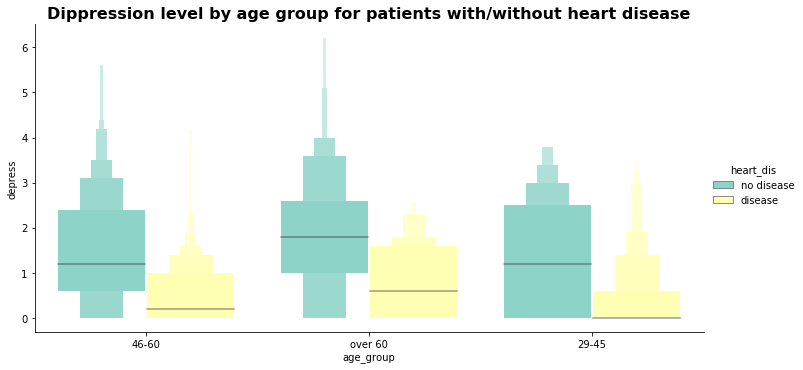

In [29]:
sns.catplot(x='age_group', y='depress', data=vis_data2, kind='boxen', hue='heart_dis', palette="Set3", saturation = 1, aspect=2)
plt.title('Dippression level by age group for patients with/without heart disease', weight='bold', fontsize=16)
plt.show()

The box plot shows us that people in the age group 29-45 with low depression level are more likely to have a heart disease. And actually it is common for aech age group. Otherwise, people with the middle depression level does not seem to have a heart disease.

## 4. Violin Chart

In [30]:
##create a subset for a violin chart
vis_data3 = heart_data[['heart_dis','bl_pres', "gend_type"]]

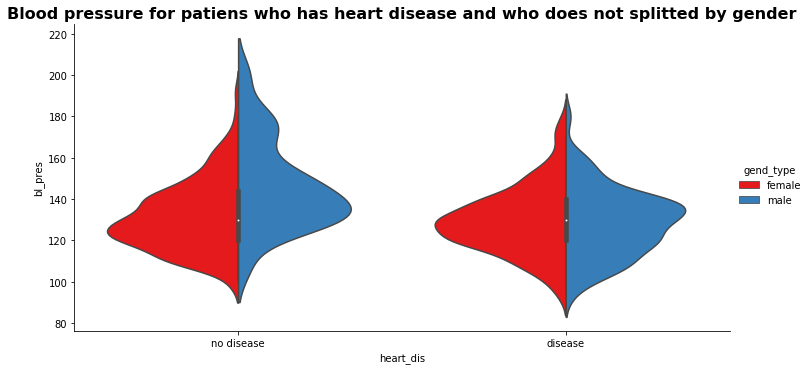

In [31]:
sns.catplot(x='heart_dis', y='bl_pres', data=vis_data3, kind='violin', hue='gend_type', palette="Set1", saturation = 2, split=True, aspect=2)
plt.title('Blood pressure for patiens who has heart disease and who does not splitted by gender', weight='bold', fontsize=16)
plt.show()

In this violin chart that we just created, it is noticable that female and male with heart disease tend to have the same level of blood pressure with the blood pressure being 190 as the maximum and the most frequencies of blood pressure amounds is 120. Meanwhile, female and male with no disease tend to have difference in the blood pressure level with the former being higher than the latter. 

<a href="#contents">Table of Contents</a>

<a id="explorecor"></a>
<div>
    <h1>
        6. Explore Correlations:
    </h1> 
</div>

In [32]:
# Loading neccessary library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

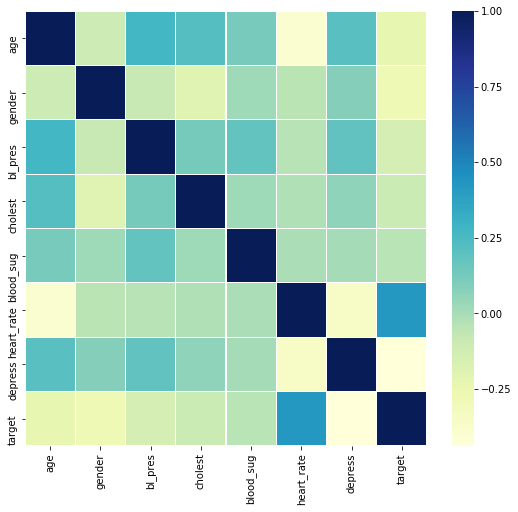

In [33]:
# Let's take a look and explore the correlations of the dataset
corrmat = heart_data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Due to the plot above we can see that such varables as blood pressure and age are correlated with a correlation level of 27%.  Also, heart rate and target has a high correlation level (39%), we can assume that depression level depends on age(21%) and blood pressure(35%).

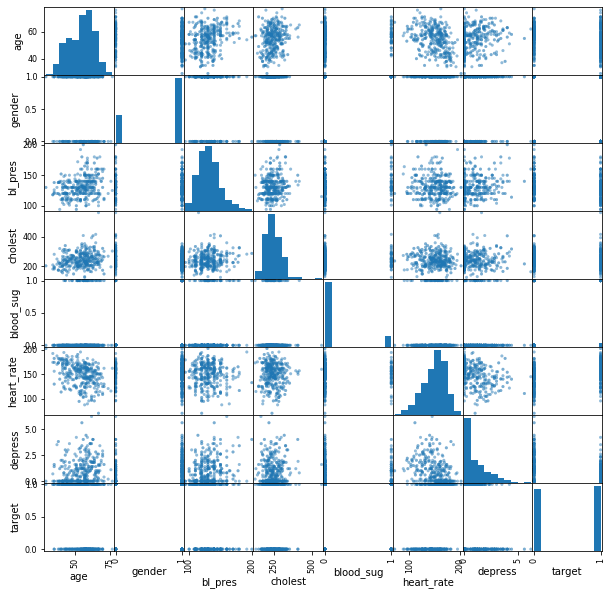

In [34]:
# Utilizing scatter matrix for exploring correlations.
from pandas.plotting import scatter_matrix
scatter_matrix(heart_data, alpha=0.2, figsize=(10, 10))
plt.show()

Text(0.5, 1, 'Correlation matrix')

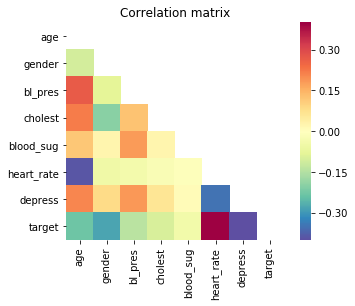

In [35]:
# Different ways to plot the correlations
corrs = heart_data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [36]:
# See the actual correlations coefficients value
heart_data.corr().round(2)

,age,gender,bl_pres,cholest,blood_sug,heart_rate,depress,target
age,1.00,-0.10,0.27,0.22,0.12,-0.39,0.21,-0.23
gender,-0.10,1.00,-0.08,-0.20,0.03,-0.05,0.08,-0.28
bl_pres,0.27,-0.08,1.00,0.13,0.18,-0.04,0.19,-0.14
cholest,0.22,-0.20,0.13,1.00,0.03,-0.02,0.06,-0.10
blood_sug,0.12,0.03,0.18,0.03,1.00,-0.01,0.01,-0.04
heart_rate,-0.39,-0.05,-0.04,-0.02,-0.01,1.00,-0.35,0.42
depress,0.21,0.08,0.19,0.06,0.01,-0.35,1.00,-0.44
target,-0.23,-0.28,-0.14,-0.10,-0.04,0.42,-0.44,1.00


As we could see from the correlation matrix, it is significant to notice that heart desease correlates strongly with heart tate (0.42) , following by depression, blood pressure and cholesteral being -0.44, -0. 28,-0.14 respectively. This demonstrate the fact that there are potential relationship among those variables affecting heart disease. We will dig deeper into analyzing these variables in the later section. 

<a href="#contents">Table of Contents</a>

<a id="stepclust"></a>
<div>
    <h1>
        7. Step-by-step hierarchical clustering
    </h1> 
</div>

In [37]:
def hierachical(sub_data1, k):
    clusters = []
    big_clusters = []
    
   # while (big_clusters != clusters):
       # big_clusters = clusters
        
    for i in range(len(sub_data1)):
            clusters.append(i)
        
    for m in range(len(sub_data1)):
            if i != m:
                distances = ([np.linalg.norm(sub_data1[i] - sub_data1[m])])
                big_clusters.append(np.argmin(distances))
                
    #for j in range(k):
                
                #big_clusters.append((big_clusters[big_clusters == j]))
                       
    return big_clusters

<a href="#contents">Table of Contents</a>

<a id="dendo"></a>
<div>
    <h1>
        8. Dendogram
    </h1> 
</div>

In [38]:
#create a subset of our heart_data dataset by choosing specific columns
sub_data2 = heart_data[["age","gender","bl_pres", 'blood_sug', "cholest","heart_rate","depress"]]

In [39]:
# change the range of the data with function MinMaxScaler and assign that to new subset "sub_data1"
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sub_data1 = scaler.fit_transform(sub_data2)
sub_data1

array([[0.47916667, 1.        , 0.29245283, ..., 0.19634703, 0.74045802,
        0.16129032],
       [0.5       , 1.        , 0.43396226, ..., 0.17579909, 0.64122137,
        0.5       ],
       [0.85416667, 1.        , 0.48113208, ..., 0.10958904, 0.41221374,
        0.41935484],
       ...,
       [0.375     , 1.        , 0.1509434 , ..., 0.34018265, 0.35877863,
        0.16129032],
       [0.4375    , 0.        , 0.1509434 , ..., 0.29223744, 0.67175573,
        0.        ],
       [0.52083333, 1.        , 0.24528302, ..., 0.14155251, 0.32061069,
        0.22580645]])

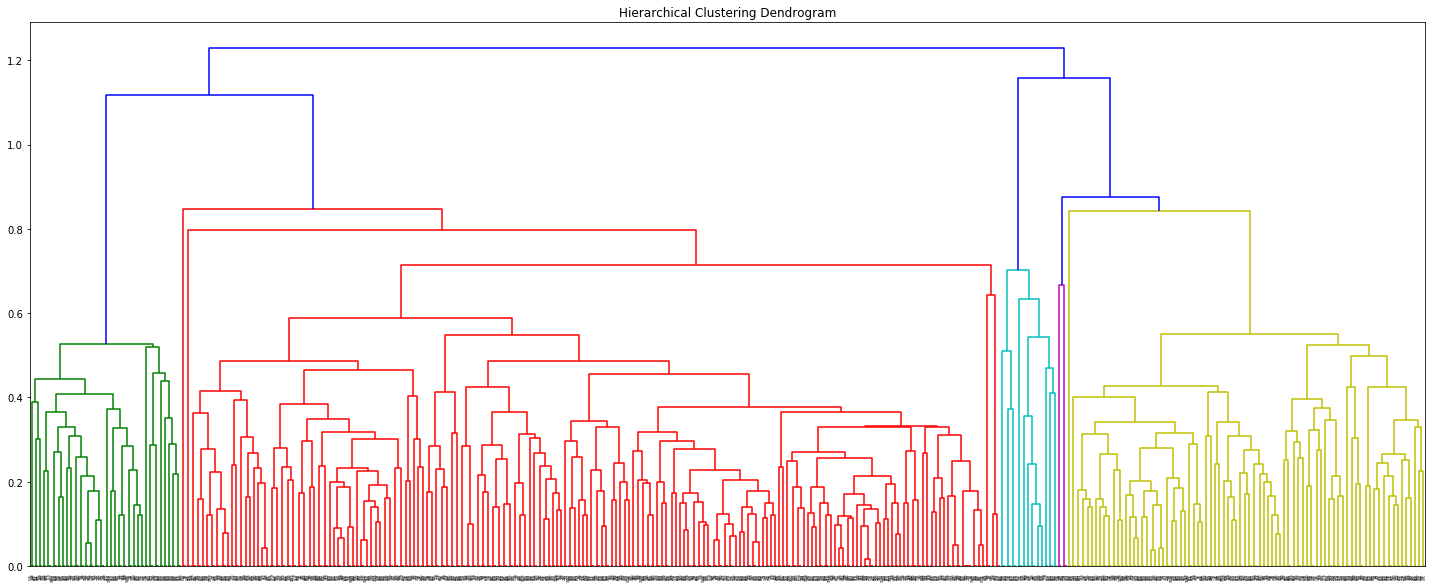

In [40]:
#plot the dendogram to choose the k number
from scipy.cluster.hierarchy import dendrogram, linkage
# Let's create dendogram to define k number of the clusters
Z = linkage(sub_data1, 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, leaf_font_size =3.)
plt.show()

After inspecting the dendrogram that was produced above by using hierarchical clustering we can suggest to use 4 different clusters for our dataset.

<a href="#contents">Table of Contents</a>

<a id="Kmeans"></a>
<div>
    <h1>
        9. Step-by-step K-means
    </h1> 
</div> 

For each point:
 - We need to find a distance from the point to centroid
 - Find the shortest distance to centroid from each point 
 - Assign to those point the number of cluster respectively

In [66]:
#randomly define 4 centroids 
import random
centroid_points = [(random.uniform(0.0, 1.0),random.uniform(0.0, 1.0),random.uniform(0.0, 1.0),
                   random.uniform(0.0, 1.0),random.uniform(0.0, 1.0),random.uniform(0.0, 1.0),
                   random.uniform(0.0, 1.0)) for i in range(4)]
centroid_points

[(0.14277425962500112,
  0.9038051972000809,
  0.9588014217070544,
  0.48581312776483243,
  0.8528227400434474,
  0.7181202245305918,
  0.7173316026302127),
 (0.8871745496558604,
  0.4274404626542072,
  0.6319942000252152,
  0.4329312469428285,
  0.4395652521104141,
  0.9731508033138864,
  0.37189115362168434),
 (0.6079818805192099,
  0.5466236770953747,
  0.006753862029046709,
  0.22009056719475084,
  0.06829895260328056,
  0.034848242661786766,
  0.2899373932096131),
 (0.7022220345951061,
  0.030825318341010877,
  0.7766841749999172,
  0.8419807050952741,
  0.02105830419780319,
  0.6163916589090029,
  0.6069169709953818)]

In [67]:
def kmean(sub_data1, k): # create a function which will calculate kmean
    centroids = centroid_points
    centroids_old = [] # create an empty variable to save there old values of centroids
    
    while(centroids_old != centroids):
        centroids_old = centroids
        clusters = []

        for i in range(len(sub_data1)):
            #calculate distance from each data point to each centroid
            distances = [np.linalg.norm(sub_data1[i] - centroid) for centroid in centroids] 
            #assign min distance between our data points and centrois to cluster
            clusters.append(np.argmin(distances))
        
        for j in range(k):
            centroids.append(np.mean(clusters[clusters==j]))
            
        return clusters

Our function kmean returns the list which define to which cluster each data point belongs to.

In [68]:
#print the the first 5 values
kmean(sub_data1, 2)[:5]

[2, 1, 2, 1, 3]

So first data point belongs to cluster 2, second data point to cluster 3 and so on.

<a href="#contents">Table of Contents</a>

  <a id="sklearn.cluster"></a>
<div>
    <h1>
        10. sklearn.cluster
    </h1> 
</div>

In this section, we will run again unsupervised k-means clustering analysis, but this time by using the sklearn.cluster library.

In [47]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [48]:
#using build in function K means cluster
model = KMeans(n_clusters = 4)
model.fit(sub_data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
#print out a cluster number for each data point
model.labels_

array([0, 2, 0, ..., 0, 3, 0], dtype=int32)

Let's create a new subset which will include only 2 columns of our data to visualize the clusters for data on the scaterplot.

In [55]:
plot_data = heart_data[["heart_rate", "depress"]]
plot_data.head()

,heart_rate,depress
0,168,1.0
1,155,3.1
2,125,2.6
3,161,0.0
4,106,1.9


In [57]:
model2 = KMeans(n_clusters = 4)
model2.fit(plot_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
model2.labels_

array([0, 3, 2, ..., 2, 3, 2], dtype=int32)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Depression Rate')

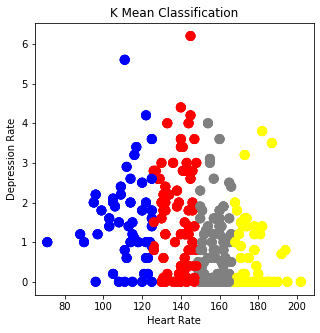

In [60]:
# View the results
# Set the size of the plot
fig = plt.figure(figsize=(5, 5))
 
# Create a colormap
colormap = np.array(['yellow', 'red', 'blue', 'grey'])
 
plt.scatter(plot_data.heart_rate, plot_data.depress, c=colormap[model2.labels_], s = 80)
plt.title('K Mean Classification')
ax = fig.add_subplot(111)
ax.set_xlabel('Heart Rate')
ax.set_ylabel('Depression Rate')


Scatter plot above visually demostrate how our data divided by 4 clusters (each cluster is a different color).

<a href="#contents">Table of Contents</a>

<a id="knn"></a>
<div>
    <h1>
        11. kNN Function
    </h1> 
</div> 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
from pandas import DataFrame

In [ ]:
heart_data.columns

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4, 
                           p = 2)# p=2 for euclidean distance
knn.fit(heart_data[["bl_pres", "heart_rate"]], 
        heart_data.target)

In [ ]:
heart_data.head()

In [ ]:
features = heart_data[['bl_pres', 'heart_rate']].values
target = heart_data['target'].values
target

In [ ]:
features1 = heart_data[['bl_pres', 'heart_rate']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Initializing the kNN classifier with 3 neighbors 

knn_classifier = KNeighborsClassifier(n_neighbors=3)

#Fitting the classifier on the training data 

knn_classifier.fit(X_train, y_train)

#Extracting the accuracy score from the test sets

knn_classifier.score(X_test, y_test)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

#Initializing a grid with possible number of neighbors from 1 to 24

grid = {'n_neighbors' : np.arange(1, 125)}

#Initializing a k-NN classifier 

knn_classifier = KNeighborsClassifier()

#Using cross validation to find optimal number of neighbors 

knn = GridSearchCV(knn_classifier, grid, cv = 10)

knn.fit(X_train, y_train)

#Extracting the optimal number of neighbors 

knn.best_params_

#Extracting the accuracy score for optimal number of neighbors

knn.best_score_

In [ ]:
knn.best_params_

In [ ]:
knn.score(X_test, y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Setting up the scaling pipeline 

pipeline_order = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 1))]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

knn_classifier_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

knn_classifier_scaled.score(X_test, y_test)

In [ ]:

knn_classifier_scaled

heart_data.columns

np.array(["bl_pres", "heart_rate"])

heart_data.target.head()

np.array(["bl_pres", "heart_rate"])

In [ ]:
#heart_data.target

In [ ]:
target[1]

In [ ]:
heart_data.target

In [ ]:
## make prediction
bl_pres = int(input('bl_pres: '))#good
heart_rate = int(input('heart_data: '))#good
data_class = knn.predict(np.array([bl_pres, heart_rate]).reshape(1, -1))[0]
class_name = [ "no Heart Disease","Heart Disease"]

print('Prediction: Loan #', data_class, class_name[data_class])
    
heart_data.loc[len(heart_data)]=[bl_pres, heart_rate, data_class]
knn.fit(heart_data[["bl_pres", "heart_rate"]], heart_data.target)
plotMesh()

In [ ]:
len(features1)

In [ ]:
features1.loc[len(features1)]=[20, 34]

In [ ]:
data_class = knn.predict(np.array([500, 140]).reshape(1, -1))[0]
data_class

In [ ]:
# make prediction
salary = int(input('Monthly Salary: '))
expenses = int(input('Monthly Expenses: '))
data_class = knn.predict(np.array([salary, expenses]).reshape(1, -1))[0]
class_name = ["N/A", "Yellow", "Red", "Blue", "Green"]

print('Prediction: Loan #', data_class, class_name[data_class])
    
loans_df.loc[len(loans_df)]=[salary, expenses, data_class]
knn.fit(loans_df[["montlhy_income", "monthly_expenses"]], loans_df.loan_type)
plotMesh()

import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors

#df = pd.read_csv('KMeans_letter_recog.csv')    

X = features
y = target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2) #20% data used

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) #test
print(accuracy) #this works fine

#bl_pres = int(input('bl_pres: '))
#heart_rate = int(input('heart_data: '))
#example = knn.predict(np.array([bl_pres, heart_rate]).reshape(1, -1))

example = np.array([7,4,3,2,4,5,3,6,7,4,2,3,5,6,8,4])
example = X.reshape(1, -1)

prediction = clf.predict(example)
print(prediction) #error

<a href="#contents">Table of Contents</a>

<a id="report"></a>
<div>
    <h1>
        12. Project Report
    </h1> 
</div> 

<a href="#contents">Table of Contents</a>